### Introduction

In the following notebook, I will be conducting a market analysis where I intend to look into the following:
- What was the loss in revenue due to COVID19? Where do you expect losses to be for the San Francisco are to be by the end of the year?
- How does the long term rental market compare to the of the tourist industry?
    - Which is more profitable? Is there evidence to suggest Airbnb should consider entering the rental housing market
    - Who are our most profitable hosts? Are people using Airbnb as a business or 

**Read in libraries**

In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Set notebook preferences**

In [195]:
#Set pandas preferences
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
#pd.options.display.float_format = '{:.2f}'.format

#Set visualization preferences
plt.style.use('Solarize_Light2')

#Set path to save visualizations
eda_path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Airbnb - San Francisco Listings Analysis\Visualizations\Modeling'

**Read in data**

In [196]:
#Set path to local machine
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Airbnb - San Francisco Listings Analysis\Data\02_Cleaned'

#Read in file
df = pd.read_csv(path + '/2020_0715_Listings_Cleaned.csv', index_col=['last_review'],
                parse_dates=['last_review'])

#Sort data
df.sort_values('last_review', inplace = True)

### Data Overview

**Preview Data**

In [197]:
#Display data, print shape
print('Data shape:', df.shape)
display(df.head(3))

Data shape: (126258, 47)


,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,cancellation_policy,city,cleaning_fee,extra_people,guests_included,host_has_profile_pic,host_id,host_identity_verified,host_is_superhost,host_name,host_response_rate,host_response_time,host_verifications,id,instant_bookable,is_location_exact,latitude,longitude,maximum_nights,minimum_nights,monthly_price,neighbourhood_cleansed,number_of_reviews,price,property_type,require_guest_phone_verification,require_guest_profile_picture,requires_license,review_scores_rating,reviews_per_month,room_type,security_deposit,weekly_price,zipcode
last_review,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-07-01,1,"Wifi,Kitchen, Free street parking , Hot tub ,...",21,335,30,60,1.0,Real Bed,1.0,1.0,4,NaN,NaN,moderate,San Francisco,30.0,0.0,1,1.0,73070632,0.0,0.0,Tina,87.0,within a few hours,"email , phone , reviews , jumio , offlin...",18546459,0,1,37.710475,-122.449333,1125,6,NaN,Outer Mission,7,45.0,Condominium,0,0,1,97.0,0.57,Private room,100.0,NaN,94112.0
2018-07-01,2,"TV, Cable TV ,Wifi,Kitchen, Free parking on p...",0,324,19,49,1.0,Real Bed,1.0,1.0,33,NaN,NaN,strict 14 with grace period,San Francisco,200.0,0.0,1,1.0,13832870,0.0,0.0,International,2.0,within an hour,"phone , reviews , jumio , offline governm...",18874655,0,1,37.802900,-122.419981,1125,30,NaN,Russian Hill,2,148.0,Apartment,0,0,1,100.0,0.18,Entire home/apt,1500.0,NaN,94133.0
2018-07-01,2,"TV, Cable TV ,Wifi,Kitchen, Free parking on p...",29,364,59,89,1.0,Real Bed,1.0,1.0,32,NaN,NaN,strict 14 with grace period,San Francisco,200.0,0.0,1,1.0,13832870,0.0,0.0,International,96.0,within a few hours,"phone , reviews , jumio , offline governm...",18874655,0,1,37.802900,-122.419981,1125,30,NaN,Russian Hill,2,144.0,Apartment,0,0,1,100.0,0.24,Entire home/apt,1500.0,NaN,94133.0


# What was the loss in revenue due to COVID19? Where do you expect losses to be for the San Francisco are to be by the end of the year?

**Prepare Data**

In [198]:
#Get daily gross rental income
daily_gross = df.groupby('last_review')['price'].sum()

#Get daily gross rental income
daily_rentals = df.groupby('last_review')['price'].count()

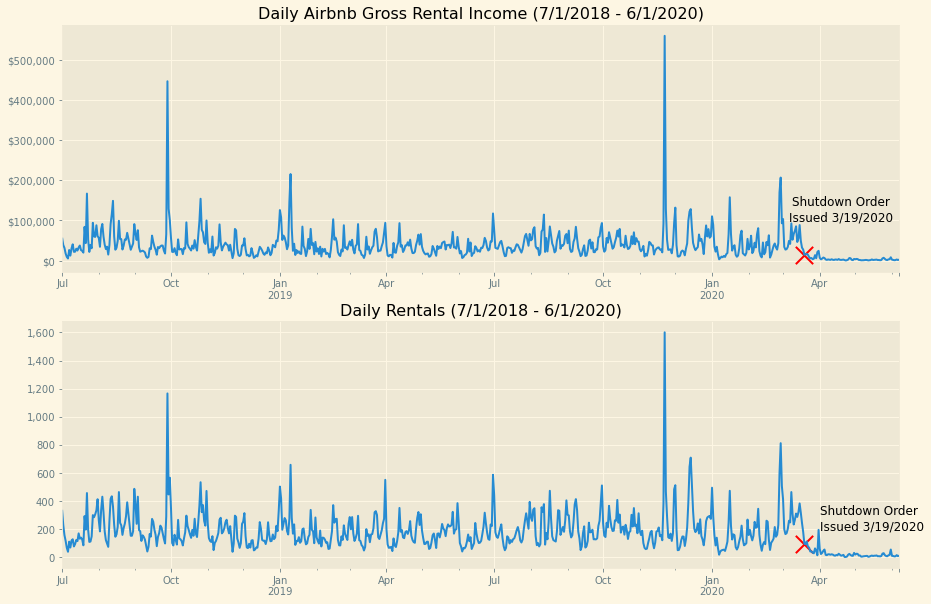

In [199]:
#Create fig
f, ax = plt.subplots(2,1,figsize = (15,10))

#Plot total revenue each day
daily_gross.plot(ax=ax[0])
ax[0].scatter('2020-03-19', 14443, color = 'red',  marker='x',s=300,  edgecolors='black',
)

#Set plot aesthetics
ax[0].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))
ax[0].set_xlabel('')
ax[0].set_title('Daily Airbnb Gross Rental Income (7/1/2018 - 6/1/2020)')
ax[0].text('2020-04-19', 100_000, 'Shutdown Order\nIssued 3/19/2020', fontsize=12,horizontalalignment='center',);


#Plot total revenue each day
daily_rentals.plot(ax=ax[1])

#Add text for Shut down
X='2020-03-19'
Y = daily_rentals.iloc[daily_rentals.index == '2020-03-19']
ax[1].scatter(X,Y, color = 'red',  marker='x',s=300,  edgecolors='black')

#Set plot aesthetics
ax[1].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax[1].set_xlabel('')
ax[1].set_title('Daily Rentals (7/1/2018 - 6/1/2020)')

ax[1].text('2020-04-01' ,Y + 100, 'Shutdown Order\nIssued 3/19/2020', fontsize=12,horizontalalignment='left',);

#Stay at home order March 19 2020

**Comparing 2019 to 2020 (3/19 - 6/7)

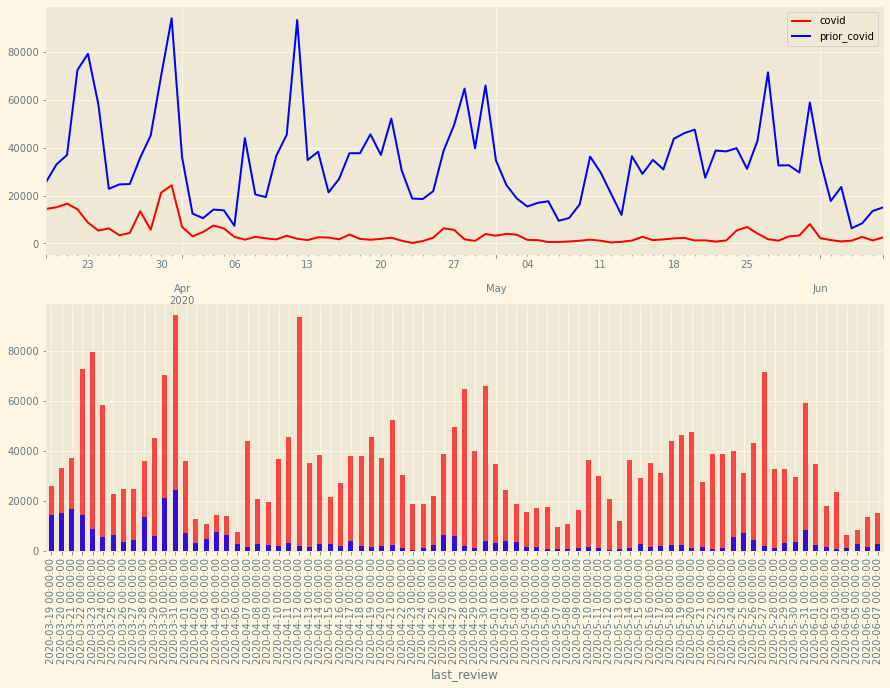

In [241]:
covid = daily_gross.iloc[627:]
prior_covid = daily_gross.iloc[261:342]

covid_comparison = pd.DataFrame({'covid': covid, 'prior_covid': prior_covid.values})

f, ax = plt.subplots(2,1, figsize = (15,10))

covid_comparison.plot(ax=ax[0], color = ['red','blue'])

covid_comparison.prior_covid.plot(kind = 'bar', ax=ax[1], color = 'r', alpha = .7)
covid_comparison.covid.plot(kind = 'bar', ax=ax[1], color ='b',alpha = .8)

In [235]:
total_loss = np.sum(covid_comparison.covid) - np.sum(covid_comparison.prior_covid)
percent_loss = (np.sum(covid_comparison.covid) - np.sum(covid_comparison.prior_covid))/np.sum(covid_comparison.prior_covid) * 100

print(percent_loss)

-88.21051499127525


Extrappolating 88% loss through end of q2(assuming no changes to lockdown), what do Q2 losses look like? What if trend continues through Q3 and 4?

In [269]:
Q2_stats = pd.DataFrame(index=np.arange(np.datetime64('2020-04-01'), np.datetime64('2020-07-01')))

Q2_stats['2020_Q2'] = daily_gross.iloc[640:]
Q2_stats['2019_Q2'] = daily_gross.iloc[274:365].values
Q2_stats.fillna(np.mean(Q2_stats['2020_Q2']), inplace = True)

Q2_loss = np.sum(Q2_stats['2020_Q2'] - Q2_stats['2019_Q2'])
print(Q2_loss)
Q2_percent_loss = np.sum(Q2_stats['2020_Q2'] - Q2_stats['2019_Q2'])/np.sum(Q2_stats['2019_Q2'])

Q2_percent_loss # fill NA with mean

-2732745.44117647


-0.922760313617966

In [249]:
#daily_gross.index.get_loc('2019-04-01') #Index
Q2_2019 = daily_gross.iloc[274:365]
Q2_2019

last_review
2019-04-01     35965.0
2019-04-02     12467.0
2019-04-03     10570.0
2019-04-04     14175.0
2019-04-05     13825.0
2019-04-06      7388.0
2019-04-07     44018.0
2019-04-08     20467.0
2019-04-09     19361.0
2019-04-10     36604.0
2019-04-11     45427.0
2019-04-12     93316.0
2019-04-13     34848.0
2019-04-14     38314.0
2019-04-15     21333.0
2019-04-16     26926.0
2019-04-17     37707.0
2019-04-18     37675.0
2019-04-19     45587.0
2019-04-20     36993.0
2019-04-21     52175.0
2019-04-22     30351.0
2019-04-23     18767.0
2019-04-24     18566.0
2019-04-25     21840.0
2019-04-26     38794.0
2019-04-27     49512.0
2019-04-28     64679.0
2019-04-29     39758.0
2019-04-30     65998.0
2019-05-01     34679.0
2019-05-02     24394.0
2019-05-03     18759.0
2019-05-04     15436.0
2019-05-05     16972.0
2019-05-06     17627.0
2019-05-07      9480.0
2019-05-08     10644.0
2019-05-09     16336.0
2019-05-10     36269.0
2019-05-11     29684.0
2019-05-12     20796.0
2019-05-13     11915.0

In [ ]:
Wednesday, April 1
and ended on
Tuesday, June 30

* Take mean of what he have in Q2 and add it at the end.
* Calculate % difference 
* Use this % to predict Q3 (reiterate lack of data)


we can also do apples to apples comparison to last year(when covide started) and calculate direct loss from covid. If trend continues, her'ews what we can lose in Q3 and Q4(worst case scenario)

# Modeling Airbnb Daily Gross Income

**Prepare data**

Lock down bagan on 3/19/2020 and with our current data has been in effect for a total of 77 days. We will use the month of May and onwards as our test set before creating a forecast for the rest of Q2 and forecasting Q3 (should similar lock down conditions hold). This might be a worst case scenario type of model

In [12]:
#Data starts at 7/4/2018(Q3) and ends 6/4/2020(Q2 ends 6/30) 702 days of data total
#Q3 is 7/1/2020 - 9/30/2020
# each quarter is  91.25 days

## Build base model - Daily Persistence forecast

In [13]:

#3/19 - 6/4 (77 days)
#we can try to forecast May 1 to June 6 and then extrapolate out throuh the end of Q3

**Prepare Data**

In [14]:
daily_gross.head()

,gross,seasonal,trend,gross_stationary
date,,,,
2018-07-04,17696.0,-10717.892657,26532.428571,1881.464086
2018-07-05,9044.0,-4546.420238,20125.285714,-6534.865476
2018-07-06,5135.0,12215.809436,18935.285714,-26016.095151
2018-07-07,26393.0,4488.673722,20208.000000,1696.326278
2018-07-08,12278.0,12378.706579,20779.428571,-20880.135151


In [113]:
#Split data on May 1st 2020
cutoff = daily_gross.index.get_loc('04-01-2020') #Was 3/19/20


**Build Persistence model**

In [114]:
persistence_model = pd.DataFrame(daily_gross.gross.iloc[cutoff:].values, columns=['actual'], index = daily_gross.gross.iloc[cutoff:].index)
persistence_model['predictions'] = persistence_model.actual.shift(periods = 1)

#Fill na with last training value
persistence_model.fillna(X_train[-1],inplace = True)

**Evaluate Predictions**

In [115]:
#Read in regression metrics
from Model_Evaluation import regression_metrics

#Evaluate persistence model predictions and store results in persistence_results
persistence_results = regression_metrics('Persistence Model', persistence_model.predictions.values,
                                        persistence_model.actual.values)

Persistence Model Evaluation Metrics:
R2: -0.10783285747692317
MAE: 1369.5076923076922 
MAPE: 64.23101100928602
MSE: 3764586.8615384614
RMSE: 1940.254329086386


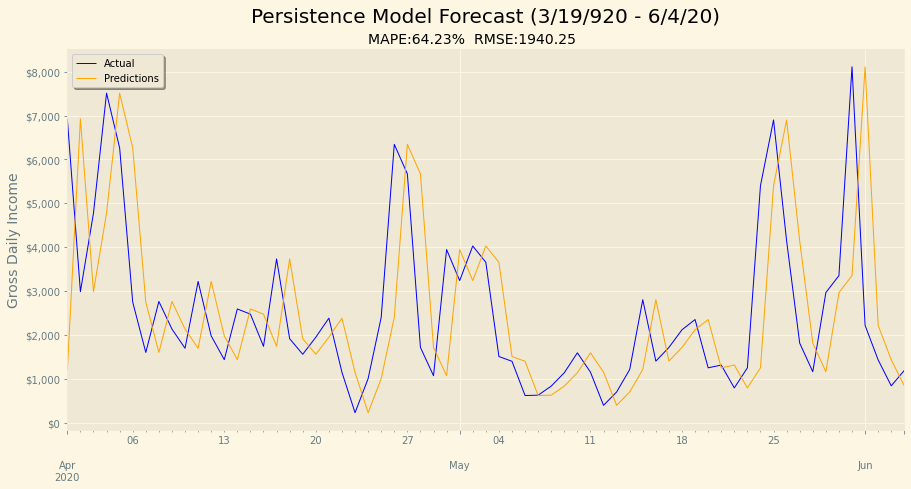

In [116]:
#Create plot
f, ax = plt.subplots( figsize = (15,7))

#Plot raw predictions
persistence_model.plot(color = ['blue','orange'], linewidth = 1, ax = ax)

###Set plot aesthetics
ax.set_title('Persistence Model Forecast (3/19/920 - 6/4/20)\n', fontsize = 20)
plt.suptitle('MAPE:{}%  RMSE:{}'.format(round(persistence_results['mape'],2),
                                      round(persistence_results['rmse'],2)),fontsize=14, y = .915)

ax.set_xlabel('')
ax.set_ylabel('Gross Daily Income', fontsize = 14)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))
ax.legend(['Actual', 'Predictions'], shadow = True, frameon = True)

#Save figure
plt.savefig(eda_path + '/Persistence_Model_Forecast.png')

In [117]:
persistence_model['rolling_avg'] = persistence_model.actual.rolling(2).mean()

persistence_model.dropna(inplace = True)

Persistence Model Evaluation Metrics:
R2: 0.7369059495611308
MAE: 650.640625 
MAPE: 31.970198364795653
MSE: 827329.8828125
RMSE: 909.5767602640802


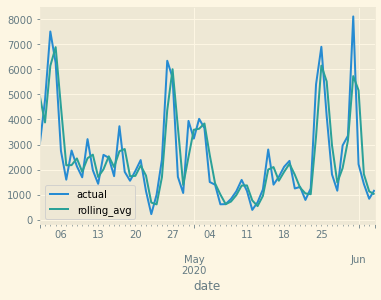

In [118]:
regression_metrics('Persistence Model', persistence_model.rolling_avg,
                                        persistence_model.actual.values)

persistence_model[['actual', 'rolling_avg']].plot()

* Take mean of what he have in Q2 and add it at the end.
* Calculate % difference 
* Use this % to predict Q3 (reiterate lack of data)


we can also do apples to apples comparison to last year(when covide started) and calculate direct loss from covid. If trend continues, her'ews what we can lose in Q3 and Q4(worst case scenario)

In [123]:
persistence_model.actual.median()

1861.5

In [124]:
Q2_min = np.min(daily_gross.iloc[cutoff:, 0])
Q2_max = np.max(daily_gross.iloc[cutoff:, 0])

print(Q2_min)
print(Q2_max)

225.0
8111.0


In [128]:
sampl = np.random.uniform(low=Q2_min, high=Q2_max, size=(27,))


In [129]:
sampl

array([6131.38143618,  555.85738527, 7791.59467106, 4457.41028673,
       3743.13560117,  493.21923354, 3325.00442636, 7222.28612292,
        355.71302964,  802.84692054, 1544.08367573, 7755.93526886,
       2986.52690166,  841.39115834, 7163.05818629, 7706.4694859 ,
       3465.18906818, 7525.86036923, 5550.83576056, 6171.15502642,
       7111.84419138, 3440.89587672, 3129.25533365,  773.43611338,
       5791.30231745, 7954.17469423, 2274.51483532])

In [127]:
daily_gross.tail

<bound method NDFrame.tail of               gross      seasonal         trend  gross_stationary
date                                                             
2018-07-04  17696.0 -10717.892657  26532.428571       1881.464086
2018-07-05   9044.0  -4546.420238  20125.285714      -6534.865476
2018-07-06   5135.0  12215.809436  18935.285714     -26016.095151
2018-07-07  26393.0   4488.673722  20208.000000       1696.326278
2018-07-08  12278.0  12378.706579  20779.428571     -20880.135151
...             ...           ...           ...               ...
2020-05-31   8111.0  12378.706579   2866.428571      -7134.135151
2020-06-01   2215.0  -2372.061992   2870.714286       1716.347707
2020-06-02   1428.0 -11446.814849   2838.285714      10036.529135
2020-06-03    838.0 -10717.892657   2541.000000       9014.892657
2020-06-04   1189.0  -4546.420238   1742.714286       3992.705953

[702 rows x 4 columns]>

- How does the long term rental market compare to the of the tourist industry?
    - Which is more profitable? Is there evidence to suggest Airbnb should consider entering the rental housing market
    - Who are our most profitable hosts? Are people using Airbnb as a business or 

### Exploring Airbnb Ownership

**Which hosts own the most Airbnb listings on the platform? Which hosts are the most popular(meaning, who has the most rented listings total)?**
- Which of these owners are renting out the entire home/apartment properties?
- What kinds of properties are these and how do they compare to other hosts
- Are these hosts also Super Hosts?

**Which hosts own the most Airbnb listings on the platform? Which hosts are the most popular(meaning, who has the most rented listings total)?**

In [43]:
#Create dataframe that contains id, name, # of listings, #of properties,  gross income, and super host flag for each renter
host_metrics = pd.DataFrame(df.groupby(['host_id','host_name'])['id'].agg(total_listings = 'count'))
host_metrics['properties'] = df.groupby(['host_id','host_name'])['id'].nunique().values#,'unique_listings':pd.Series.nunique})
host_metrics['gross_income'] = df.groupby(['host_id','host_name'])['price'].sum().values
host_metrics['superhost?'] = df.groupby(['host_id','host_name'])['host_is_superhost'].sum().values
host_metrics['superhost?'] = host_metrics['superhost?'].apply(lambda x: False if x == 0 else True)
host_metrics['avg_monthly_bookings'] = host_metrics['total_listings']/24

#Tidy cols
host_metrics.sort_values(by = 'properties',ascending = False,inplace = True)
host_metrics = host_metrics.reindex(sorted(host_metrics.columns), axis=1)

#Check
display(host_metrics.head(10))

,,avg_monthly_bookings,gross_income,properties,superhost?,total_listings
host_id,host_name,,,,,
48005494,Zeus,82.208333,381849.0,155,True,1973
219930816,Sonder (San Francisco),35.291667,149725.0,107,False,847
4430421,Landmark,43.208333,90084.0,64,False,1037
64646820,Michelle,28.666667,134789.0,53,True,688
173206762,Stratford,23.083333,42184.0,50,False,554
17042045,The Bartlett,26.000000,61619.0,49,False,624
70722023,Michael,26.541667,57202.0,49,True,637
103340667,Sheena,25.375000,88086.0,44,False,609
117141107,Zarinah,32.583333,59570.0,43,True,782


**Who are these hosts?**

7 of the top 10 property holders on Airbnb in SF are hotels or fully-furnished rental comanies(for short and long-term rent). These incluse:
- Zeus(furnished home living)
- Sonder(furnished rental)
- Landmark(hotel)
- Stratford(hotel)
- The Bartlett(hotel)
- Blueground(fully furnished apartments)

**What kinds of properties do the top hosts have?**


**What do we know about these hosts?**

** What kinds of properties do the top of the top have and how many?**

**What % of the total revenue are these people responsible for?**

- What kinds of properties are these and how do they compare to other hosts

**Check price distribution w/ and w/o outliers